In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
df_train.shape

(576, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [6]:
df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [7]:
df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [8]:
df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [9]:
df_train.nunique()

profile pic               2
nums/length username     54
fullname words            9
nums/length fullname     25
name==username            2
description length      104
external URL              2
private                   2
#posts                  193
#followers              372
#follows                400
fake                      2
dtype: int64

In [10]:
df_train.corr()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
profile pic,1.000000,-0.364087,0.213295,-0.131756,-0.124903,0.367892,0.236729,0.114732,0.169570,0.061137,0.194833,-0.637315
nums/length username,-0.364087,1.000000,-0.225472,0.408567,0.056890,-0.321170,-0.237125,-0.063713,-0.157442,-0.062785,-0.172413,0.587687
fullname words,0.213295,-0.225472,1.000000,-0.094348,-0.082969,0.272522,0.196562,-0.089070,0.073350,0.033225,0.094855,-0.298793
nums/length fullname,-0.131756,0.408567,-0.094348,1.000000,0.291149,-0.117521,-0.088724,-0.030030,-0.057716,-0.027035,-0.067971,0.246782
name==username,-0.124903,0.056890,-0.082969,0.291149,1.000000,-0.064814,-0.039232,0.046084,-0.049808,-0.017761,-0.009529,0.170695
description length,0.367892,-0.321170,0.272522,-0.117521,-0.064814,1.000000,0.482313,-0.110329,0.144824,0.005929,0.226561,-0.460825
external URL,0.236729,-0.237125,0.196562,-0.088724,-0.039232,0.482313,1.000000,-0.162612,0.165008,0.027189,0.142519,-0.362809
private,0.114732,-0.063713,-0.089070,-0.030030,0.046084,-0.110329,-0.162612,1.000000,-0.087495,-0.073473,-0.057542,-0.028586
#posts,0.169570,-0.157442,0.073350,-0.057716,-0.049808,0.144824,0.165008,-0.087495,1.000000,0.321385,0.098225,-0.245355
#followers,0.061137,-0.062785,0.033225,-0.027035,-0.017761,0.005929,0.027189,-0.073473,0.321385,1.000000,-0.011066,-0.093689


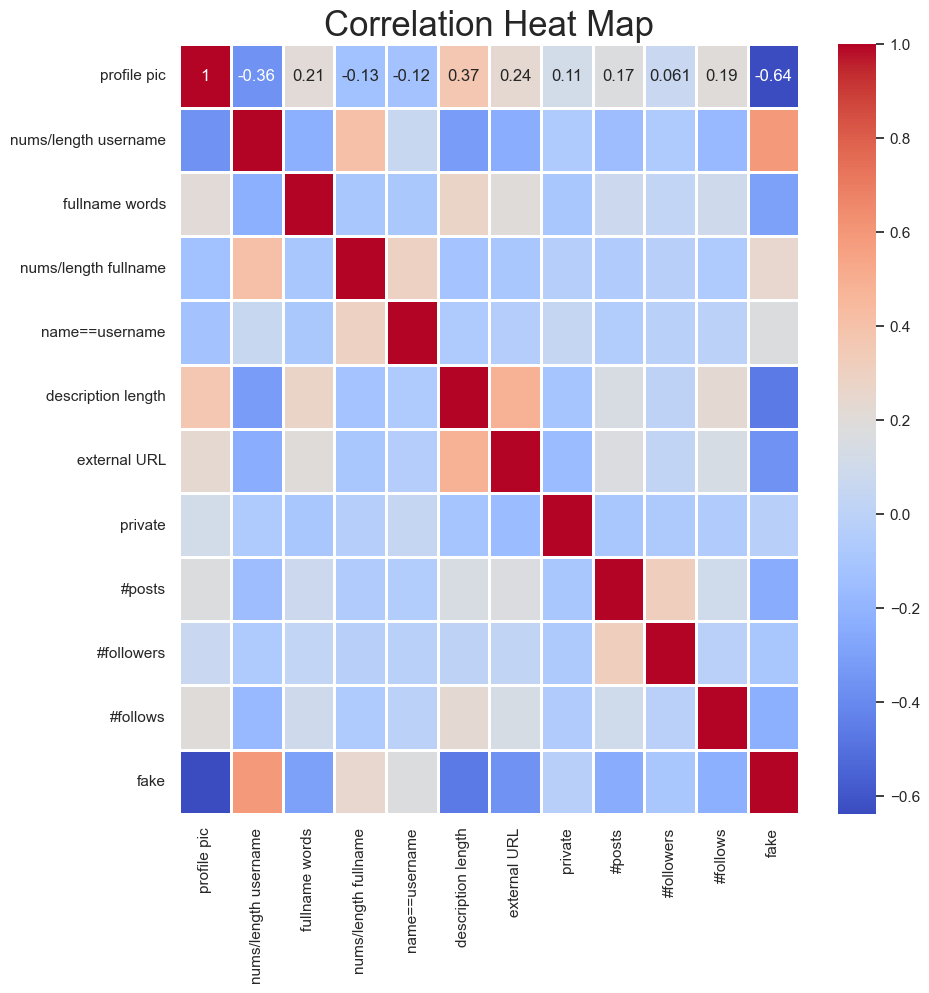

In [11]:
plt.figure(figsize=(10,10))


sns.heatmap(df_train.corr(), cmap="coolwarm", annot = True, linewidth = 2,)

plt.title("Correlation Heat Map", fontsize = 25)
plt.show()

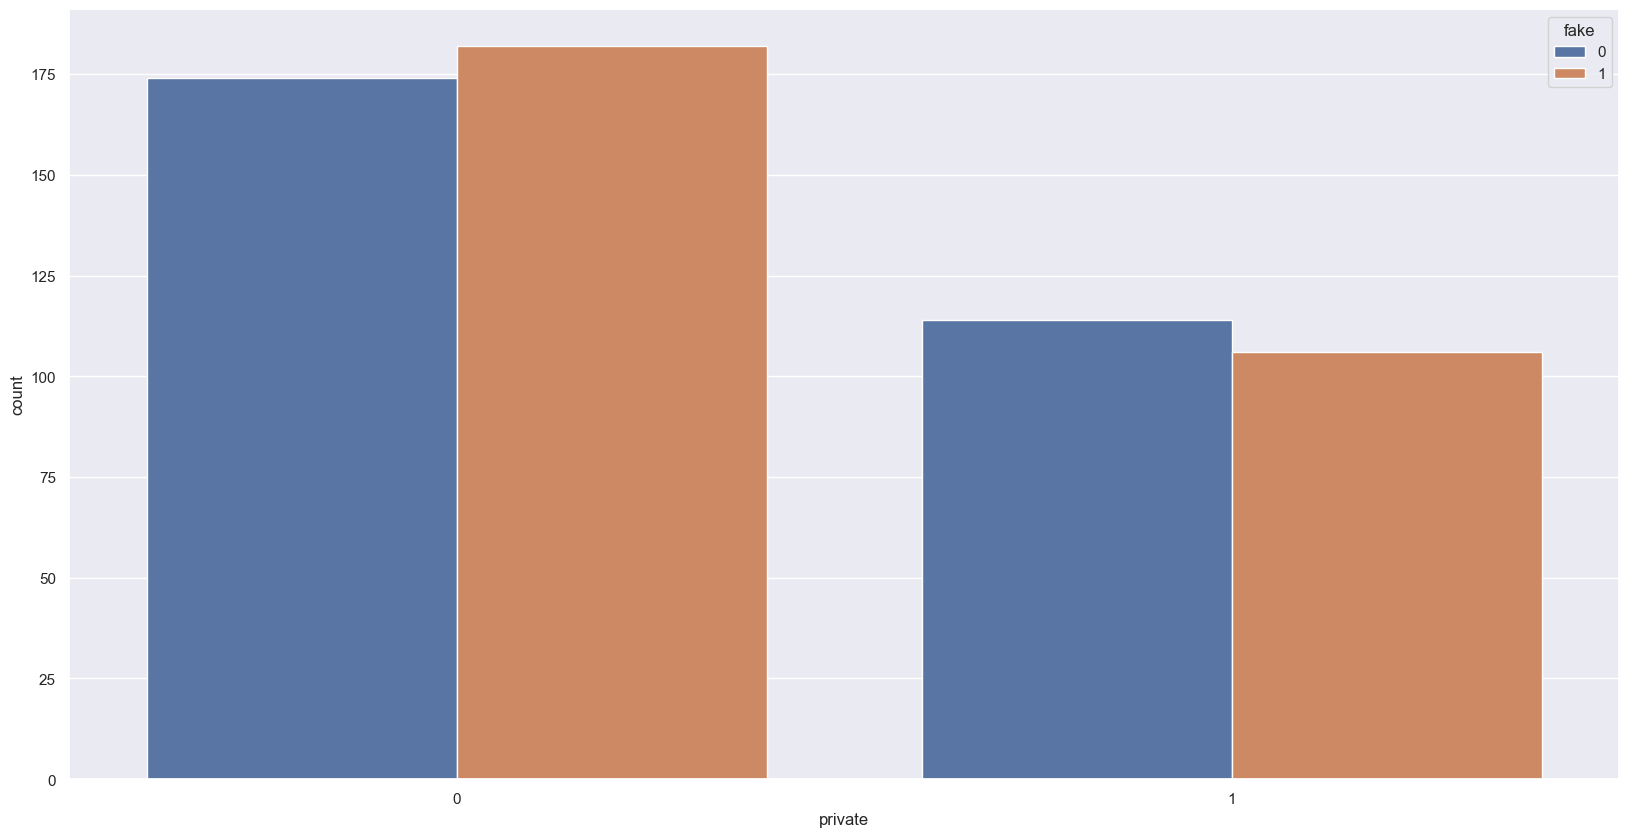

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='private', hue='fake', data=df_train)
plt.show()

In [13]:
# Separate features and target variable
X = df_train.drop('fake', axis=1)  # Features
y = df_train['fake']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy of the Decision Tree model: 0.87
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  6]
 [ 9 44]]


In [15]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20]
}
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [16]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 20}
Best accuracy found:  0.9086956521739131


In [17]:
y_pred_optimized = grid_search.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print("Optimized accuracy on the test set: ", optimized_accuracy)
print(f"Optimized Precision: {precision_score(y_test, y_pred_optimized):.2f}")
print(f"Optimized Recall: {recall_score(y_test, y_pred_optimized):.2f}")
print(classification_report(y_test, y_pred_optimized))

Optimized accuracy on the test set:  0.8362068965517241
Optimized Precision: 0.81
Optimized Recall: 0.83
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        63
           1       0.81      0.83      0.82        53

    accuracy                           0.84       116
   macro avg       0.83      0.84      0.84       116
weighted avg       0.84      0.84      0.84       116



In [18]:
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

Cross-validation scores: [0.88043478 0.89130435 0.80434783 0.90217391 0.85869565]
Mean cross-validation score: 0.87


profile pic: 0.11
nums/length username: 0.08
fullname words: 0.01
nums/length fullname: 0.00
name==username: 0.01
description length: 0.07
external URL: 0.00
private: 0.01
#posts: 0.05
#followers: 0.64
#follows: 0.04


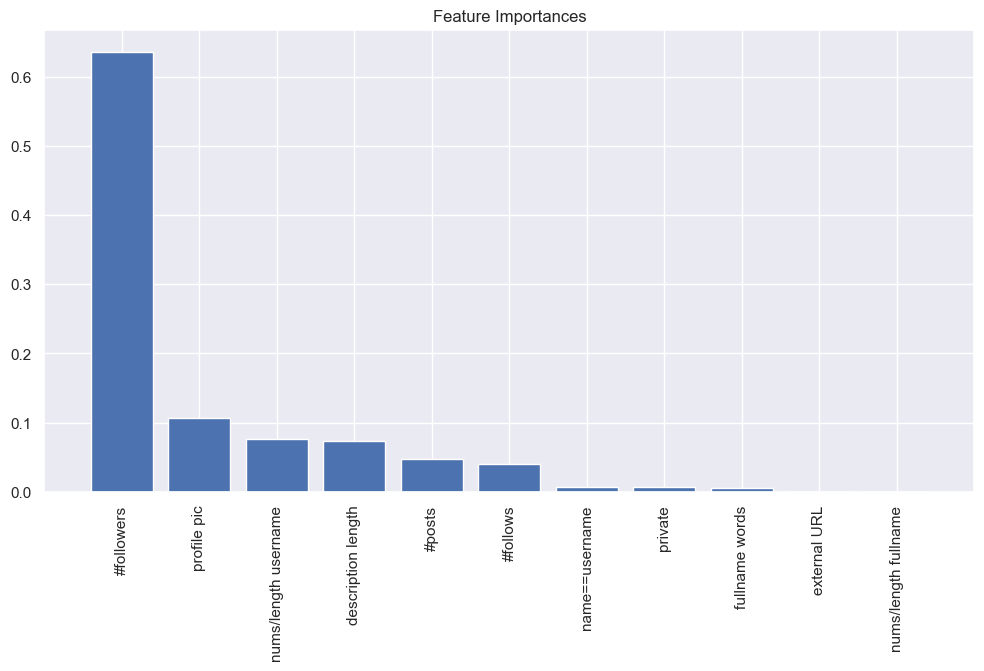

In [19]:
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.2f}')

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


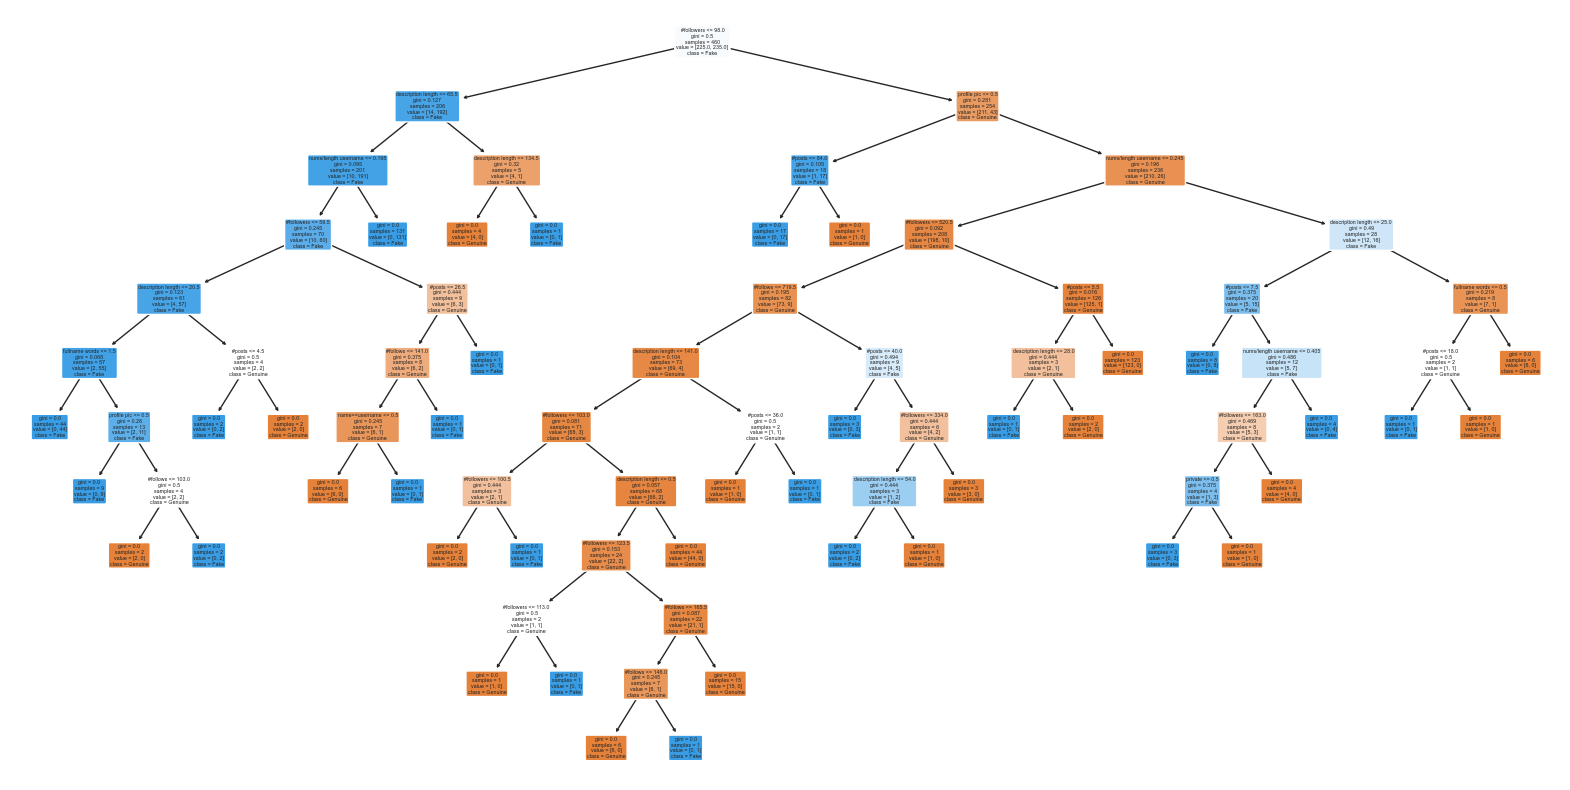

In [20]:
plt.figure(figsize=(20,10))

plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Genuine', 'Fake'], rounded=True)
plt.show()


In [21]:
df_test = pd.read_csv('test.csv')
df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [22]:
X_test = df_test.drop('fake', axis=1)  # Features
y_test = df_test['fake']  # Target variable
y_pred = dt_classifier.predict(X_test)
y_pred = dt_classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
print(confusion_matrix(df_test['fake'], y_pred))

[[56  4]
 [ 4 56]]


In [24]:
accuracy_score(df_test['fake'], y_pred)

0.9333333333333333

In [25]:
print(classification_report(df_test['fake'], y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        60
           1       0.93      0.93      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



profile pic: 0.11
nums/length username: 0.08
fullname words: 0.01
nums/length fullname: 0.00
name==username: 0.01
description length: 0.07
external URL: 0.00
private: 0.01
#posts: 0.05
#followers: 0.64
#follows: 0.04


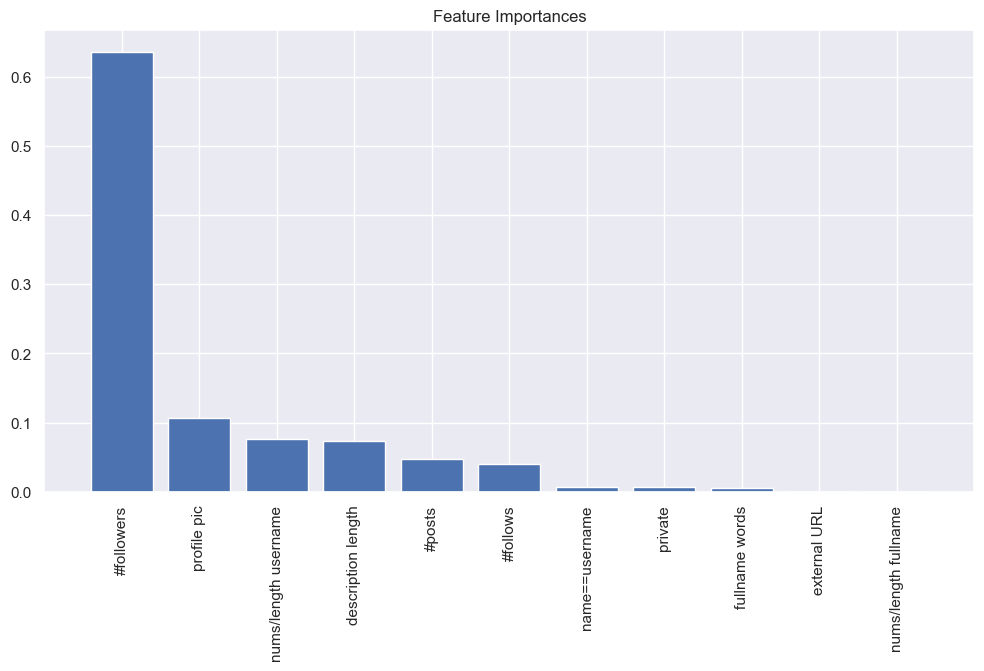

In [26]:
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.2f}')

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [27]:
split_index = int(len(df_train) * 0.8)
X_train_new = df_train.iloc[:split_index].drop('fake', axis=1)
y_train_new = df_train.iloc[:split_index]['fake']
X_val = df_train.iloc[split_index:].drop('fake', axis=1)
y_val = df_train.iloc[split_index:]['fake']

# Now train your Decision Tree on this new training set
dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_split=20, random_state=42)
dt_classifier.fit(X_train_new, y_train_new)

# Predict on the validation set
y_val_pred = dt_classifier.predict(X_val)

print(classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97       116

    accuracy                           0.94       116
   macro avg       0.50      0.47      0.48       116
weighted avg       1.00      0.94      0.97       116

Accuracy: 0.9396551724137931


In [28]:
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

print("CV Mean Accuracy: ", cv_scores.mean())

CV Mean Accuracy:  0.9086956521739131
